In [1]:
import joblib
import matplotlib.pyplot as plt
#from quadratic_weighted_kappa_edit import quadratic_weighted_kappa, onehalf_weighted_kappa, confusion_matrix, weighted_matrix, onehalf_weighted_matrix, linear_weighted_kappa, histogram, onenine_weighted_kappa
import numpy as np
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
import krippendorff
from pycm import *

### Example of Kappa paradox

In [2]:
A = [1,2,3,4,5]
B = [2,1,3,5,4]

qwk = []
acc = []
lwk = []
cohen = []
kripp = []
bang = []
scott = []
onenine = []

qwk.append(cohen_kappa_score(A,B, weights='quadratic'))
acc.append(accuracy_score(A,B))
lwk.append(cohen_kappa_score(A,B, weights='linear'))
cohen.append(cohen_kappa_score(A,B))

concat_AB = np.concatenate((np.array(A).reshape(1,-1),np.array(B).reshape(1,-1)), axis=0)
kripp.append(krippendorff.alpha(concat_AB))

cm = ConfusionMatrix(A,B)
bang.append(cm.B)
scott.append(cm.PI)

A.append(6)
B.append(6)

for i in range(50):
    A.append(1)
    B.append(2)
    A.append(2)
    B.append(3)
    A.append(3)
    B.append(4)
    A.append(5)
    B.append(2)
    A.append(1)
    B.append(3)
    
    qwk.append(cohen_kappa_score(A,B, weights='quadratic'))
    acc.append(accuracy_score(A,B))
    lwk.append(cohen_kappa_score(A,B, weights='linear'))
    cohen.append(cohen_kappa_score(A,B))
    
    concat_AB = np.concatenate((np.array(A).reshape(1,-1),np.array(B).reshape(1,-1)), axis=0)
    kripp.append(krippendorff.alpha(concat_AB))
    
    cm = ConfusionMatrix(A,B)
    bang.append(cm.B)
    scott.append(cm.PI)
    

print("QWK: ", cohen_kappa_score(A,B, weights='quadratic'))
print("accuracy: ", accuracy_score(A,B))
print("LWK: ", cohen_kappa_score(A,B, weights='linear'))
print("Cohen's Kappa: ", cohen_kappa_score(A,B))
concat_AB = np.concatenate((np.array(A).reshape(1,-1),np.array(B).reshape(1,-1)), axis=0)
print("Krippendorff's Alpha: ", krippendorff.alpha(concat_AB))
print("Bangdiwala's B: ", cm.B)
print("Scott's PI: ", cm.PI)

QWK:  -0.025479547605998798
accuracy:  0.0078125
LWK:  -0.08218060060688503
Cohen's Kappa:  -0.1816100308922406
Krippendorff's Alpha:  -0.04962444433089774
Bangdiwala's B:  0.00019036740909956216
Scott's PI:  -0.29970017989206477


In [3]:
len(A)

256

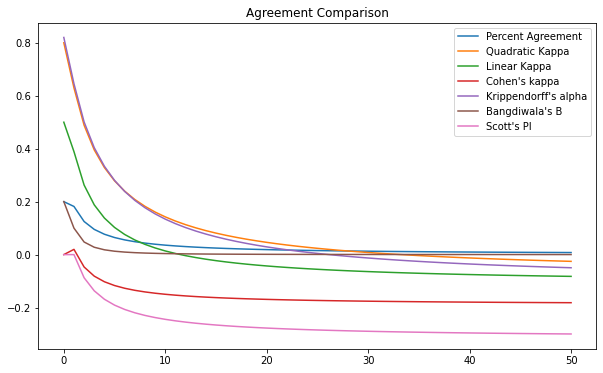

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("Agreement Comparison")
plt.plot(acc, label='Percent Agreement')
plt.plot(qwk, label='Quadratic Kappa')
plt.plot(lwk, label='Linear Kappa')
plt.plot(cohen, label='Cohen\'s kappa')
plt.plot(kripp, label='Krippendorff\'s alpha')
plt.plot(bang, label='Bangdiwala\'s B')
plt.plot(scott, label='Scott\'s PI')
plt.legend()
plt.savefig('comparison.png')

In [5]:
confusion_matrix(A,B)

array([[ 0, 51, 50,  0,  0,  0],
       [ 1,  0, 50,  0,  0,  0],
       [ 0,  0,  1, 50,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0, 50,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

## Test

In [28]:
A = [1,2,3]
B = [2,1,3]

qwk = []
acc = []
lwk = []
cohen = []
kripp = []
bang = []
scott = []
onenine = []

qwk.append(cohen_kappa_score(A,B, weights='quadratic'))
acc.append(accuracy_score(A,B))
lwk.append(cohen_kappa_score(A,B, weights='linear'))
cohen.append(cohen_kappa_score(A,B))

concat_AB = np.concatenate((np.array(A).reshape(1,-1),np.array(B).reshape(1,-1)), axis=0)
kripp.append(krippendorff.alpha(concat_AB))

cm = ConfusionMatrix(A,B)
bang.append(cm.B)
scott.append(cm.PI)

for i in range(50):
    A.append(1)
    B.append(1)
#     A.append(2)
#     B.append(3)
#     A.append(3)
#     B.append(4)
#     A.append(5)
#     B.append(2)
#     A.append(1)
#     B.append(3)
    
    qwk.append(cohen_kappa_score(A,B, weights='quadratic'))
    acc.append(accuracy_score(A,B))
    lwk.append(cohen_kappa_score(A,B, weights='linear'))
    cohen.append(cohen_kappa_score(A,B))
    
    concat_AB = np.concatenate((np.array(A).reshape(1,-1),np.array(B).reshape(1,-1)), axis=0)
    kripp.append(krippendorff.alpha(concat_AB))
    
    cm = ConfusionMatrix(A,B)
    bang.append(cm.B)
    scott.append(cm.PI)
    

print("QWK: ", cohen_kappa_score(A,B, weights='quadratic'))
print("accuracy: ", accuracy_score(A,B))
print("LWK: ", cohen_kappa_score(A,B, weights='linear'))
print("Cohen's Kappa: ", cohen_kappa_score(A,B))
concat_AB = np.concatenate((np.array(A).reshape(1,-1),np.array(B).reshape(1,-1)), axis=0)
print("Krippendorff's Alpha: ", krippendorff.alpha(concat_AB))
print("Bangdiwala's B: ", cm.B)
print("Scott's PI: ", cm.PI)

QWK:  0.79296875
accuracy:  0.9622641509433962
LWK:  0.6558441558441559
Cohen's Kappa:  0.4854368932038835
Krippendorff's Alpha:  0.794921875
Bangdiwala's B:  0.9608144448713023
Scott's PI:  0.4854368932038844


In [29]:
A.append(4)
B.append(4)

print("QWK: ", cohen_kappa_score(A,B, weights='quadratic'))
print("accuracy: ", accuracy_score(A,B))
print("LWK: ", cohen_kappa_score(A,B, weights='linear'))
print("Cohen's Kappa: ", cohen_kappa_score(A,B))
concat_AB = np.concatenate((np.array(A).reshape(1,-1),np.array(B).reshape(1,-1)), axis=0)
print("Krippendorff's Alpha: ", krippendorff.alpha(concat_AB))
print("Bangdiwala's B: ", cm.B)
print("Scott's PI: ", cm.PI)

QWK:  0.925
accuracy:  0.9629629629629629
LWK:  0.8258064516129032
Cohen's Kappa:  0.6538461538461539
Krippendorff's Alpha:  0.9256944444444445
Bangdiwala's B:  0.9608144448713023
Scott's PI:  0.4854368932038844


In [30]:
A.append(5)
B.append(5)

print("QWK: ", cohen_kappa_score(A,B, weights='quadratic'))
print("accuracy: ", accuracy_score(A,B))
print("LWK: ", cohen_kappa_score(A,B, weights='linear'))
print("Cohen's Kappa: ", cohen_kappa_score(A,B))
concat_AB = np.concatenate((np.array(A).reshape(1,-1),np.array(B).reshape(1,-1)), axis=0)
print("Krippendorff's Alpha: ", krippendorff.alpha(concat_AB))
print("Bangdiwala's B: ", cm.B)
print("Scott's PI: ", cm.PI)

QWK:  0.964516129032258
accuracy:  0.9636363636363636
LWK:  0.8942307692307692
Cohen's Kappa:  0.7380952380952381
Krippendorff's Alpha:  0.9648387096774194
Bangdiwala's B:  0.9608144448713023
Scott's PI:  0.4854368932038844


In [15]:
len(A)

53

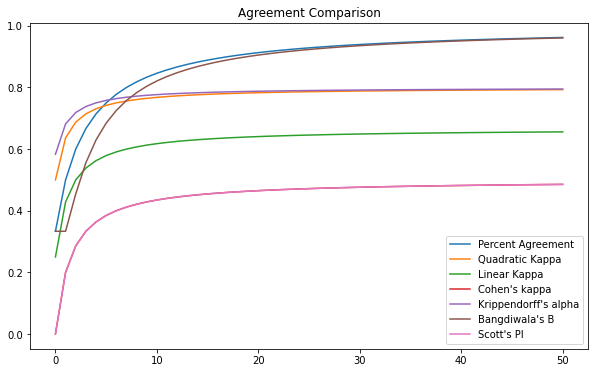

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("Agreement Comparison")
plt.plot(acc, label='Percent Agreement')
plt.plot(qwk, label='Quadratic Kappa')
plt.plot(lwk, label='Linear Kappa')
plt.plot(cohen, label='Cohen\'s kappa')
plt.plot(kripp, label='Krippendorff\'s alpha')
plt.plot(bang, label='Bangdiwala\'s B')
plt.plot(scott, label='Scott\'s PI')
plt.legend()
#plt.savefig('comparison.png')